In [2]:
import sklearn as sk
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt

# Load Data

In [2]:
data=pd.read_json('young_adult_10000.json', lines=True)

In [3]:
data_task1=data[['rating','review_text']]
print(data_task1[:10])

   rating                                        review_text
0       5  I cracked and finally picked this up. Very enj...
1       5  I read this book because my fifth grade son wa...
2       4  Though the book started out slow and only star...
3       2  *Update - 10/27/13* - After some sleep, I thin...
4       5  This is a moving, heartbreaking, view into a l...
5       5  I never thought I would enjoy a zombie books w...
6       5  What a great ending to the trilogy!! The secon...
7       5                                         LOVED IT!!
8       5                    Exciting, fun, entertaining! :)
9       5  LET'S JUST SAY I AM SO THANKFUL I HAVE THE NEX...


# Task1

In [4]:
data_task1['Count_of_Exclamation']=data_task1['review_text'].str.count('!')
data_task1_new=data_task1[['rating','Count_of_Exclamation']]
print(data_task1_new[:10])

   rating  Count_of_Exclamation
0       5                     0
1       5                     1
2       4                     0
3       2                     0
4       5                     0
5       5                     0
6       5                     4
7       5                     2
8       5                     1
9       5                     0


C:\Users\solit\AppData\Local\Temp\ipykernel_11404\1394676782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_task1['Count_of_Exclamation']=data_task1['review_text'].str.count('!')


In [5]:
from sklearn import linear_model
def trainModel(model,X_train,y_train):
    model.fit(X_train,y_train)
    W=model.coef_
    b=model.intercept_
    return W,b

In [6]:
LR_model1=linear_model.LinearRegression(fit_intercept=True)
X1=np.array(data_task1_new['Count_of_Exclamation']).reshape(-1,1)
y1=np.array(data_task1_new['rating'])
W1,b1=trainModel(LR_model1,X1,y1)
print(W1,b1)

[0.07109019] 3.688533040832031


In [7]:
x_predict1=np.arange(0,65,5)
y_predict1=x_predict1*W1+np.ones(len(x_predict1))*b1

Text(0.5, 1.0, 'Rating vs. Count_of_Exclamation')

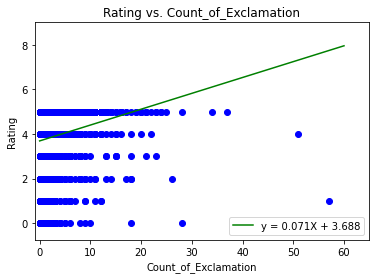

In [8]:
plt.scatter(X1,y1,c='b')
plt.plot(x_predict1,y_predict1,label="y = "+str(W1[0])[:5]+"X + "+str(b1)[:5],c='green')
plt.xlim(-1,65)
plt.ylim(-0.75,9)
plt.legend(loc="lower right")
plt.xlabel("Count_of_Exclamation")
plt.ylabel("Rating")
plt.title("Rating vs. Count_of_Exclamation")

$Calculation$ $of$ $MSE$

In [9]:
def MSE_calculation(LR_model,X,y,num):
    y_pred=LR_model.predict(X)
    SE=[i**2 for i in (y-y_pred)]
    SSE=sum(SE)
    MSE=SSE/len(y)
    print("The Task{}'s MSE is {:.5f}".format(num,MSE))
MSE_calculation(LR_model1,X1,y1,1)

The Task1's MSE is 1.52317


# Task2

In [10]:
data_task2=data[['rating','review_text']]
data_task2['Count_of_Exclamation']=data_task2['review_text'].str.count('!')
data_task2['Len_of_Review']=data_task2['review_text'].str.len()

data_task2_new=data_task2[['rating','Len_of_Review','Count_of_Exclamation']]
print(data_task2_new[:10])

   rating  Len_of_Review  Count_of_Exclamation
0       5           1326                     0
1       5            224                     1
2       4            118                     0
3       2           1952                     0
4       5            554                     0
5       5            486                     0
6       5            257                     4
7       5             10                     2
8       5             31                     1
9       5             62                     0


C:\Users\solit\AppData\Local\Temp\ipykernel_11404\868553029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_task2['Count_of_Exclamation']=data_task2['review_text'].str.count('!')
C:\Users\solit\AppData\Local\Temp\ipykernel_11404\868553029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_task2['Len_of_Review']=data_task2['review_text'].str.len()


[-4.12150653e-05  7.52759173e-02] 3.7175128077972013


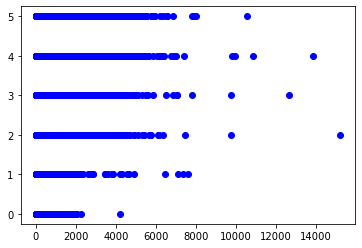

In [11]:
X2=np.array(data_task2_new[['Len_of_Review','Count_of_Exclamation']])
y2=np.array(data_task2_new['rating'])
LR_model2=linear_model.LinearRegression(fit_intercept=True)
W2,b2=trainModel(LR_model2,X2,y2)
print(W2,b2)
plt.scatter(X2[:,0],y2,c='b')

$Calculation$ $of$ $MSE$

In [12]:
MSE_calculation(LR_model2,X2,y2,2)

The Task2's MSE is 1.52140


# Task 3

In [13]:
data_task3=data_task1_new[:]
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [14]:
def train_PolyModel(degree,X_train,y_train):
    PolyRegression=make_pipeline(PolynomialFeatures(degree=degree,include_bias=True),\
                                 linear_model.LinearRegression(fit_intercept=True))
    PolyRegression.fit(X_train,y_train)
    return PolyRegression

In [15]:
def poly_plot(polyModel,X,y,X_predict):
    plt.figure()
    plt.scatter(X,y)
    y_predict=polyModel.predict(X_predict)
    plt.plot(X_predict,y_predict,c="g")
    plt.title("Task3")
    plt.show()
def MSE_calculation(LR_model,X,y):
    y_pred=LR_model.predict(X)
    SE=[i**2 for i in (y-y_pred)]
    SSE=sum(SE)
    MSE=SSE/len(y)
    return MSE

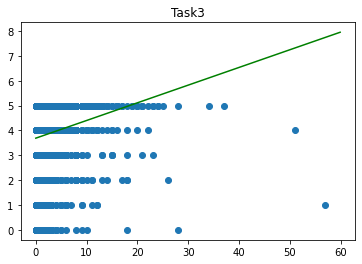

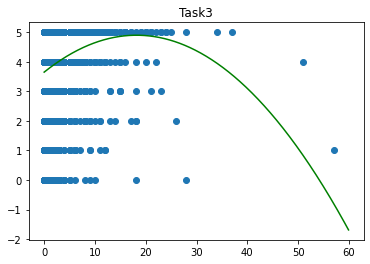

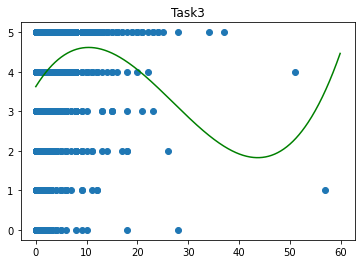

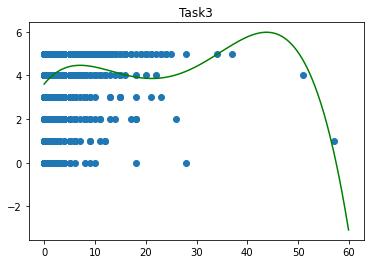

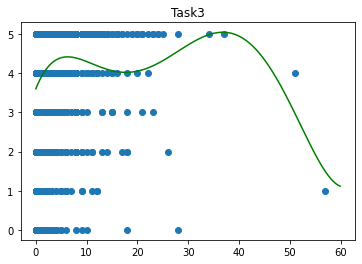

[1.5231747404538272, 1.5046686106251046, 1.4966845515179144, 1.4904477302230843, 1.4896106953961357]


In [16]:
X3=np.array(data_task3['Count_of_Exclamation']).reshape(-1,1)
y3=np.array(data_task3['rating'])
x_predict3=np.arange(0,60,0.1)
MSE_lst=[]
for i in range(1,6):
    PolyRegression=train_PolyModel(i,X3,y3)
    poly_plot(PolyRegression,X3,y3,x_predict3.reshape(-1,1))
    MSE_lst.append(MSE_calculation(PolyRegression,X3,y3))
print(MSE_lst)

# Task4

In [17]:
half=len(data_task3)//2
X4_train=np.array(data_task3[:half]['Count_of_Exclamation']).reshape(-1,1)
y4_train=np.array(data_task3[:half]['rating'])

In [18]:
X4_test=np.array(data_task3[half:]['Count_of_Exclamation']).reshape(-1,1)
y4_test=np.array(data_task3[half:]['rating'])
MSE_lst_task4=[]
for i in range(1,6):
    PolyRegression=train_PolyModel(i,X4_train,y4_train)
    MSE_lst_task4.append(MSE_calculation(PolyRegression,X4_test,y4_test))
print("MSE with different on test set:")
print(MSE_lst_task4)

MSE with different on test set:
[1.5248743859866747, 1.4977199259322138, 1.485663219031148, 1.476733744007583, 1.4809577271803667]


# Task5

In [19]:
# using median as predictor is one best way to predict the value with MAE loss
from statistics import median
y5_train_median=median(y4_train)
print("MAE on the test set of Task4:")
MAE=sum([abs(i-y5_train_median) for i in y4_test])/len(y4_test)
print(MAE)

MAE on the test set of Task4:
0.907


# Task6

load data

In [3]:
def parseData(fname):
    for l in open(fname):
        yield eval(l)
data2 = list(parseData("beer_50000.json"))
print(data2[0])

{'review/appearance': 2.5, 'beer/style': 'Hefeweizen', 'review/palate': 1.5, 'review/taste': 1.5, 'beer/name': 'Sausa Weizen', 'review/timeUnix': 1234817823, 'beer/ABV': 5.0, 'beer/beerId': '47986', 'beer/brewerId': '10325', 'review/timeStruct': {'isdst': 0, 'mday': 16, 'hour': 20, 'min': 57, 'sec': 3, 'mon': 2, 'year': 2009, 'yday': 47, 'wday': 0}, 'review/overall': 1.5, 'review/text': 'A lot of foam. But a lot.\tIn the smell some banana, and then lactic and tart. Not a good start.\tQuite dark orange in color, with a lively carbonation (now visible, under the foam).\tAgain tending to lactic sourness.\tSame for the taste. With some yeast and banana.', 'user/profileName': 'stcules', 'review/aroma': 2.0}


In [4]:
#discarding entries that don’t include a specified gender
data2_gender=[d for d in data2 if 'user/gender' in d]
print(len(data2_gender))
print(data2_gender[-11])

20403
{'review/appearance': 4.0, 'beer/style': 'American Double / Imperial Stout', 'review/palate': 4.0, 'review/taste': 4.5, 'beer/name': "Stoudt's Fat Dog (Imperial Oatmeal Stout)", 'review/timeUnix': 1204432271, 'user/gender': 'Female', 'beer/ABV': 9.0, 'beer/beerId': '20539', 'beer/brewerId': '394', 'review/timeStruct': {'isdst': 0, 'mday': 2, 'hour': 4, 'min': 31, 'sec': 11, 'mon': 3, 'year': 2008, 'yday': 62, 'wday': 6}, 'review/overall': 4.5, 'review/text': '12 oz bottle\t\tblack with very little head.. not alot of lacing, but not bad for 9%\t\tSmelled of roasted malts and sweet fruit, but not very strong smell for an imperial stout\t\ttaste was a very well balanced, well blended roasted flavor with dark, sweet fruits mixed in, plum, fig, raisen. \t\tVery creamy and easy to drink. This one went down surprisingly well for such a high abv... wish i had more than one.', 'user/profileName': 'tayner', 'review/aroma': 3.5}


In [5]:
data_task6=np.array([[ 0 if d['user/gender'] =='Male' else 1, d['review/text'].count('!')] for d in data2_gender])
X_task6=data_task6[:,1].reshape(-1,1)
y_task6=data_task6[:,0]


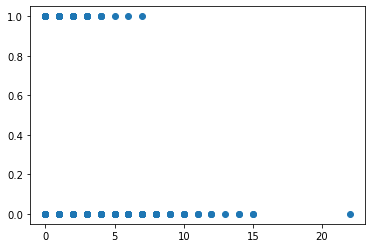

In [6]:
plt.scatter(X_task6,y_task6)

In [7]:
from sklearn.linear_model import LogisticRegression
LgR_model_task6=LogisticRegression()
LgR_model_task6.fit(X_task6,y_task6)
y_predict_task6=LgR_model_task6.predict(X_task6)

In [12]:
def accuracy_calculation(y,y_predict):
    TruePt,TrueNg,FalsePt,FalseNg=0,0,0,0
    for i in range(len(y_predict)):
        if y_predict[i]==0:
            if y[i]==0:
                TrueNg+=1
            else:
                FalseNg+=1
        else:
            if y[i]==1:
                TruePt+=1
            else:
                FalsePt+=1
    BER=0.5*((FalsePt/(FalsePt+TrueNg))+(FalseNg/(FalseNg+TruePt)))
    return [TruePt,TrueNg,FalsePt,FalseNg,BER]
res= accuracy_calculation(y_task6,y_predict_task6)
print(res)
sample_weight=np.ones(len(X_task6))
print(LgR_model_task6.score(X_task6,y_task6,sample_weight))

[0, 20095, 0, 308, 0.5]
0.9849041807577317


# Task7 

In [13]:
LgR_model_task7=LogisticRegression(class_weight='balanced')
LgR_model_task7.fit(X_task6.reshape(-1,1),y_task6)
y_predict_task7=LgR_model_task7.predict(X_task6)
res_task7 = accuracy_calculation(y_task6,y_predict_task7)
print(res_task7)
#sample_weight=np.ones(len(X_task6))
print(LgR_model_task7.score(X_task6,y_task6,sample_weight))

[88, 16332, 3763, 220, 0.4507731134255145]
0.8047836102533941


In [28]:
print("{}".format((16552+ 88)/(sum(res_task7))))

0.8155663382835857


# Task 8

In [35]:
y_predict_task8 = LgR_model_task7.predict_proba(X_task6)
y_predict_task8new=[]
for i,j in enumerate(y_predict_task8):
    y_predict_task8new.append([j[1],i])

In [36]:
y_predict=LgR_model_task7.predict(X_task6)
y_predict

array([0, 0, 0, ..., 0, 1, 0])

In [37]:
y_predict_task8

array([[0.51833511, 0.48166489],
       [0.51833511, 0.48166489],
       [0.51833511, 0.48166489],
       ...,
       [0.51833511, 0.48166489],
       [0.42555024, 0.57444976],
       [0.51833511, 0.48166489]])

In [38]:
y_predict_task8new.sort(reverse=True)

In [39]:
y_predict_task8new

[[0.9826055977849775, 8619],
 [0.9386097615245664, 10416],
 [0.9386097615245664, 9768],
 [0.9269291406025542, 16284],
 [0.9269291406025542, 8093],
 [0.913231518490005, 13408],
 [0.8972508135988608, 17341],
 [0.8972508135988608, 16579],
 [0.8972508135988608, 11236],
 [0.8787177228987151, 14686],
 [0.8787177228987151, 13756],
 [0.8787177228987151, 9083],
 [0.8573731583574731, 17167],
 [0.8573731583574731, 12812],
 [0.8573731583574731, 10020],
 [0.8573731583574731, 8470],
 [0.8573731583574731, 7919],
 [0.8329861176882454, 15181],
 [0.8329861176882454, 9055],
 [0.8329861176882454, 5934],
 [0.8329861176882454, 1042],
 [0.8329861176882454, 372],
 [0.8053758112350426, 19184],
 [0.8053758112350426, 17728],
 [0.8053758112350426, 14011],
 [0.8053758112350426, 13152],
 [0.8053758112350426, 9363],
 [0.8053758112350426, 8833],
 [0.8053758112350426, 8399],
 [0.8053758112350426, 8343],
 [0.8053758112350426, 7230],
 [0.8053758112350426, 6468],
 [0.8053758112350426, 6226],
 [0.8053758112350426, 6083],


In [40]:
def precisionAtK(y,y_predict,k):
    TruePt,TrueNg,FalsePt,FalseNg=0,0,0,0
    for i in range(k):
        if y_predict[i][0]>0.50:
            if y[y_predict[i][1]]==1:
                TruePt+=1
            else:
                FalsePt+=1
        else:
            if y[y_predict[i][1]]==0:
                TrueNg+=1
            else:
                FalseNg+=1
            
    return (TruePt/(TruePt+FalsePt))

In [41]:
res=[]
for k in [1, 10, 100, 1000, 10000]:
    res.append(precisionAtK(y_task6,y_predict_task8new,k))
print(res)

[0.0, 0.0, 0.03, 0.022, 0.022851207478576992]
